In [36]:
import pandas as pd
import numpy as np
import os
import sys
import glob
import seaborn as sns
import imageio
import skimage
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tifffile import imread

# example visualiztion

img.shape=(97, 478, 666)


/tmp/ipykernel_1428184/2320538230.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Proportion of Pixels')

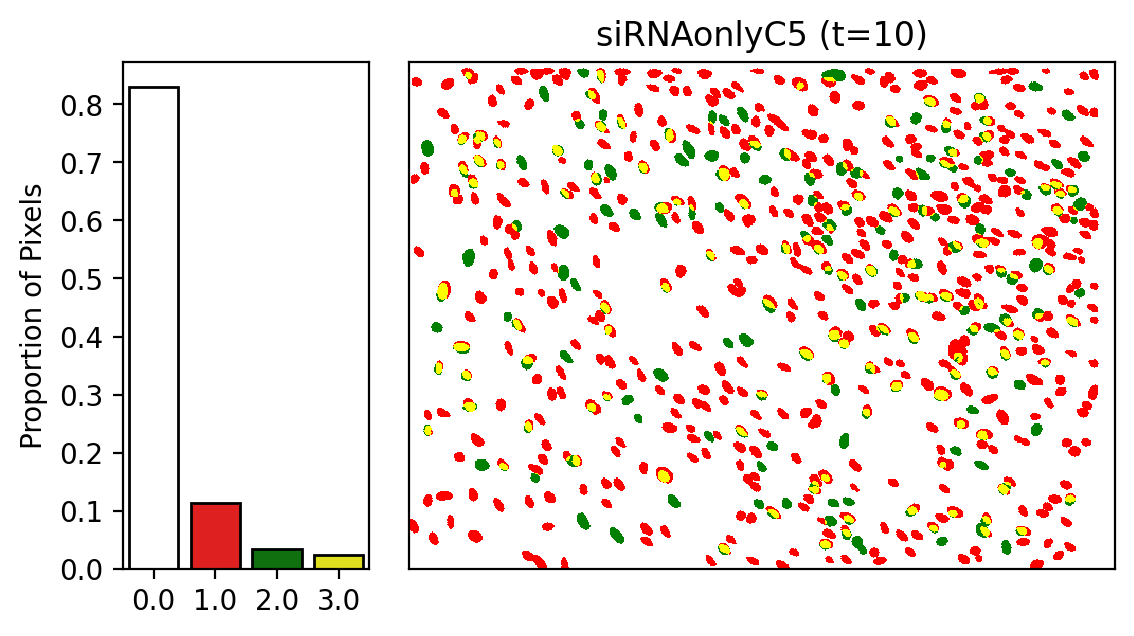

In [4]:
fpath = "/scratch/indikar_root/indikar1/shared_data/apollo/labels/siRNAonlyC5.tiff"
basename = os.path.basename(fpath).split(".")[0]
img = imread(fpath)
print(f"{img.shape=}")

time = 10
img_t = img[time, :, :]
counts = pd.Series(img_t.ravel()).value_counts(normalize=True)

plt.rcParams['figure.dpi'] = 200

sns.heatmap(
    img_t,
    square=True,
    cmap=['w', 'r', 'g', 'yellow'],
    cbar=False,
)

plt.title(f"{basename} (t={time})")
plt.yticks([])
plt.xticks([])
    
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Create a divider for the colorbar
divider = make_axes_locatable(ax)

# Add a colorbar axes to the right of the main plot
ax2 = divider.append_axes("left", size="35%", pad=0.20)
sns.barplot(
    counts,
    ax=ax2,
    ec='k',
    palette=['w', 'r', 'g', 'yellow'],
)

ax2.set_ylabel("Proportion of Pixels")

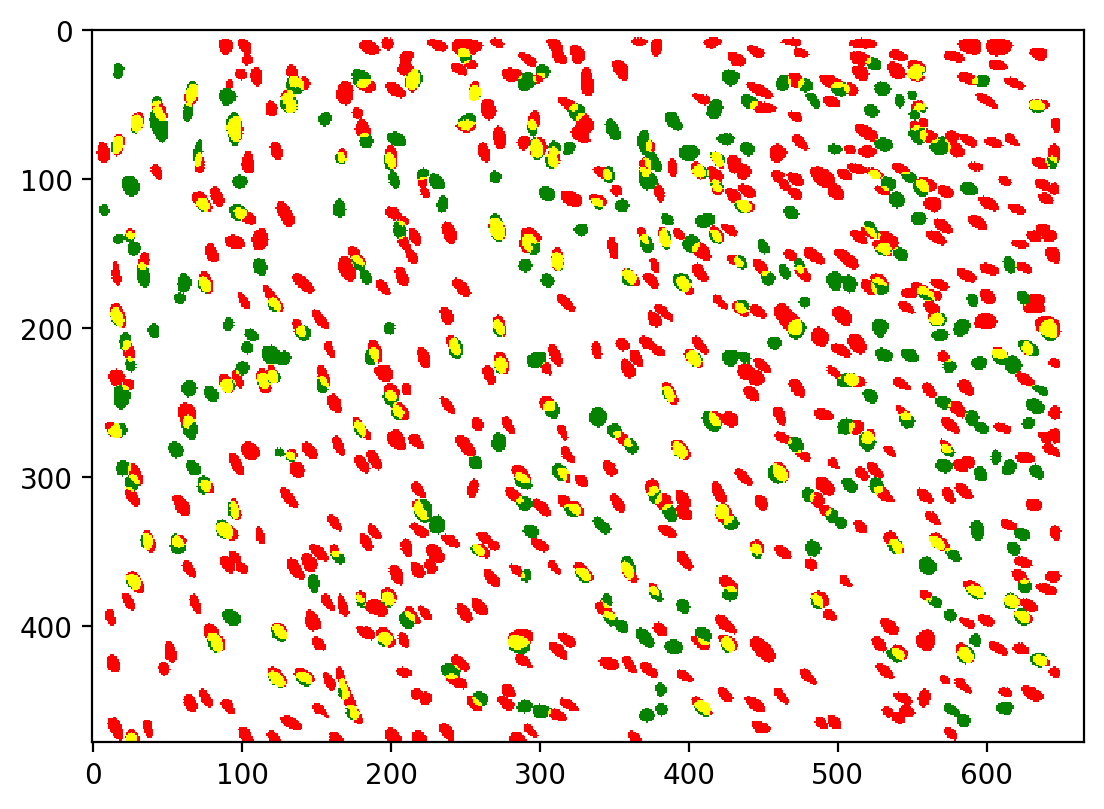

In [39]:
# 2. Create figure and axes
fig, ax = plt.subplots()

# Define the colors and their positions (0 to 1)
colors = [
    (0.0, 'white'),   # White at the start
    (0.33, 'red'),    # Red at 1/3 of the way
    (0.66, 'green'),  # Green at 2/3 of the way
    (1.0, 'yellow')   # Yellow at the end
]

# Create a LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('white_red_green_yellow', colors, N=256)

im = ax.imshow(
    img[0], 
    cmap=cmap, 
    interpolation='nearest',
)

plt.yticks([])
plt.xticks([])

# 4. Define the animation function
def animate(i):
    im.set_array(img[i])  # Update the image data
    return im,

# 5. Create the animation
ani = animation.FuncAnimation(
    fig, 
    animate, 
    frames=len(img), 
    interval=250, 
    blit=True,
)

# 6. Save the animation as a GIF
ani.save('/home/cstansbu/temp/test.gif', writer='pillow')

plt.show()

In [3]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Quantify the changes in cell intensity over time

In [15]:
dpath = "/scratch/indikar_root/indikar1/shared_data/apollo/pixel_counts/"
file_list = glob.glob(f"{dpath}/*")

result = []

for fpath in file_list:
    basename = os.path.basename(fpath).split(".")[0]
    df = pd.read_csv(fpath)
    
    # normalize pixel values
    df = df.set_index('Time')
    df = df.div(df.sum(axis=1), axis=0)
    df = df.reset_index(drop=False)
    
    df['basename'] = basename
    df['Condition'] = basename[:-2] 
    df['Hour'] = df['Time'] / 2
    
    result.append(df)
    
    
result = pd.concat(result)
print(f"{result.shape=}")
result.head()

result.shape=(1940, 8)


,Time,None,Red,Green,Both,basename,Condition,Hour
0,0,0.910937,0.060371,0.018753,0.009939,mmRNAonlyC2,mmRNAonly,0.0
1,1,0.908185,0.059824,0.020393,0.011597,mmRNAonlyC2,mmRNAonly,0.5
2,2,0.904366,0.061254,0.021392,0.012989,mmRNAonlyC2,mmRNAonly,1.0
3,3,0.899990,0.063952,0.021728,0.014330,mmRNAonlyC2,mmRNAonly,1.5
4,4,0.901802,0.063490,0.020393,0.014315,mmRNAonlyC2,mmRNAonly,2.0


<Axes: xlabel='Hour', ylabel='Both'>

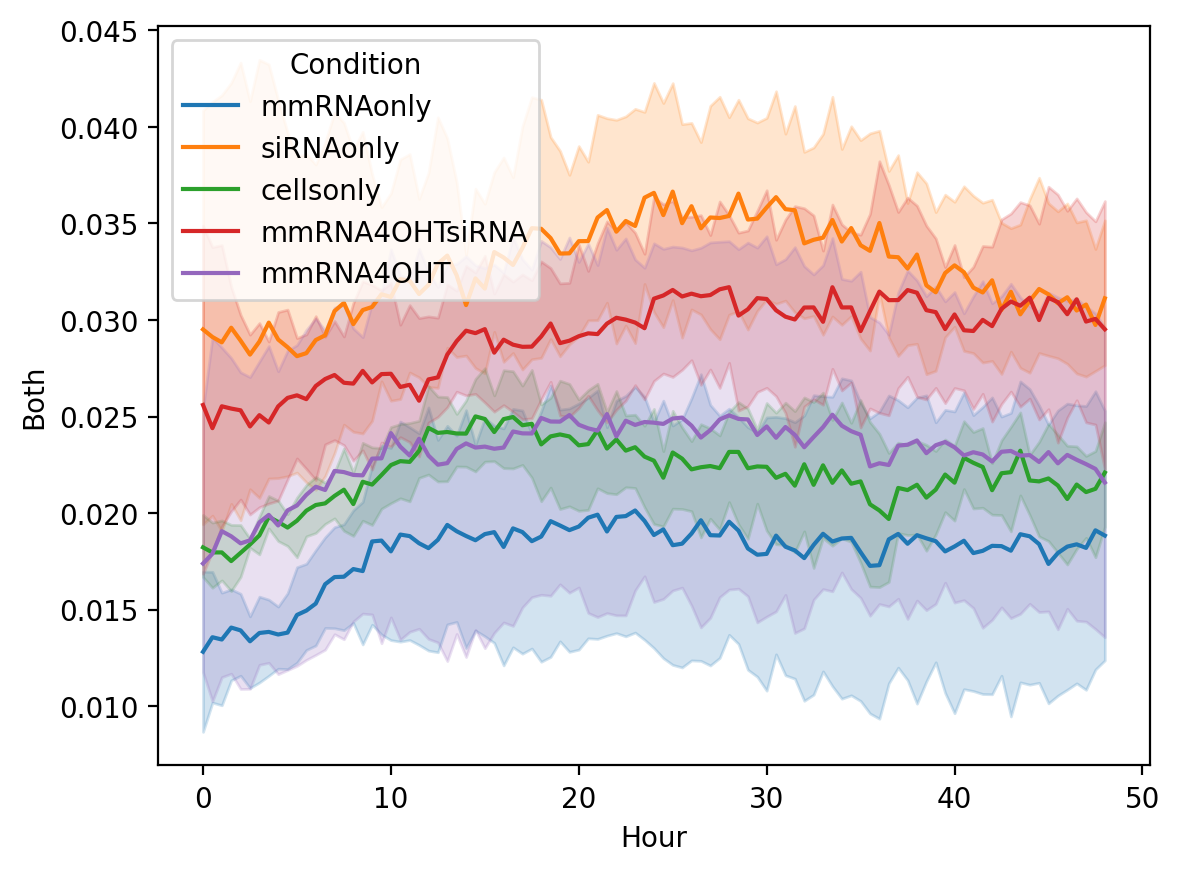

In [24]:
sns.lineplot(
    data=result,
    x='Hour',
    y='Both',
    hue='Condition',
    # legend=False,
)

In [ ]:
sns.lineplot(
    data=result,
    x='Hour',
    y='Red',
    hue='Condition'
)

In [ ]:
sns.lineplot(
    data=result,
    x='Hour',
    y='Green',
    hue='Condition'
)

In [ ]:
sns.lineplot(
    data=result,
    x='Hour',
    y='Both',
    hue='Condition'
)